# Predicating price of Airbnb in New York City

New York city is the most populous city in the United States. New York City is also the most densely populated major city in the United States. New York City has been described as the cultural, financial, and media capital of the world, significantly influencing commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports. Home to the headquarters of the United Nations, New York is an important center for international diplomacy. Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world.If you are interested to visit New York, here is what Airbnb officers in New York City. The data set I will use New York City Airbnb open data(https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

# Table of Contents:
1. **Importing Libraries**
2. **Loading the dataset**
3. **Data Cleaning:** 
 - Dropping duplicates.
 - Cleaning missing rows.
4. **Data Visualization:** Using plots to find relations between the features.
    - Get Correlation between different variables
    - Plot all Neighbourhood Group
    - Neighbourhood
    - Room Type
    - Relation between neighbourgroup and Availability of Room
    - Map of Neighbourhood group
    - Map of Neighbourhood
    - Availabity of rooom
5. **Regression Analysis**
 - Linear Regression
 - Evaluated metrics


## 1. Importing Libraries

In [1]:
#import Labraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn import metrics

%matplotlib inline

## 2.  Loading Dataset

In [3]:
#Loading AB_NYC_2019 dataset
air_bnb_nyc = pd.read_csv("AB_NYC_2019.csv")

#### Print out the first 5 rows.

- The head() function is used to get the first n rows.

In [3]:
#print the first 5 rows of the dataset
air_bnb_nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#print the summary of the dataset
air_bnb_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Print Statistical Summary

In [5]:
#print details statistical summary 
air_bnb_nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## 3. Data pre-processing

### Print the Data types of the dataset

In [6]:
#print out the data types of the dataset
air_bnb_nyc.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Check if there is Duplicate data

In [4]:
#Check if there is duplicate data in the dataset
#based on the result there is no duplicated data in the given dataset
air_bnb_nyc.duplicated().sum()

0

### 3.1 Handling Missing Values

In [5]:
#Check for the null values in each column
#Name, host_name, last_reviewsa and reviews_per_month has NaN data in the dataset
air_bnb_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### 3.2 Drop unnecessary columns

Columns `name`, `host_name` and `last_review` are irrelevant and insignificant to our data analysis. So, we will drop the unnecessary columns.

In [6]:
#Drop name, id, host_name and last_review columns.
air_bnb_nyc.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

#### Rreplace the 'reviews per month' by zero

For "review_per_month" column we can simply append it with 0.0 for missing values; we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews there will be 0.0 rate of reviews per month.

In [7]:
#Replace the revies_per_month with 0
air_bnb_nyc.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
air_bnb_nyc.reviews_per_month.isnull().sum()

0

### Examing categorical data

In [8]:
#examining the unique values of n_group as this column will appear very handy for later analysis
air_bnb_nyc.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [9]:
#examining the unique values of room_type as this column will appear very handy for later analysis
air_bnb_nyc.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## 4. Exploring and Visualizing Data

The first graph is about the relationship between price and room type. The Shared room price is always lower than 2000 dollars. On the other hand, the private room and the entire home have the highest price in some.

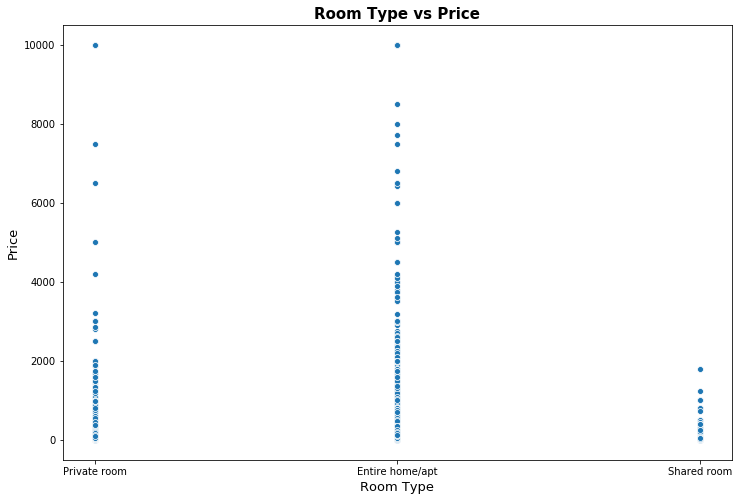

In [10]:
#Visualizing the relationship between price and room type.
plt.figure(figsize=(12,8))
sns.scatterplot(x='room_type', y='price', data=air_bnb_nyc)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')
plt.savefig('price_and_room type.png')

The graph shows details about price and room type based on neighborhood group. The highest price of Private Room and Entire Home/Aptis in the same area which is Manhattan. Also, Brooklyn has very-high prices both in Private Room and Entire Home/Apt. On the other hand, shared room's highest price is in the Queens area.

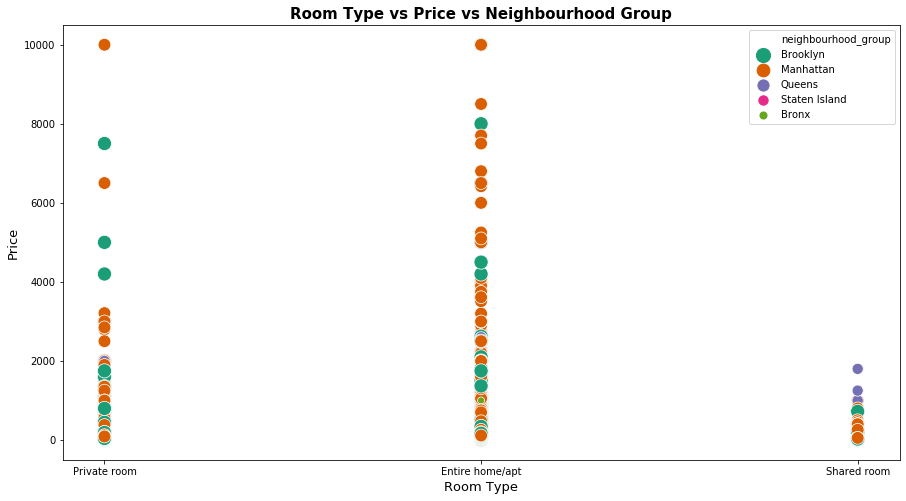

In [11]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=air_bnb_nyc)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')
plt.savefig('Room_type_Price_Neighbourhood_group.png')

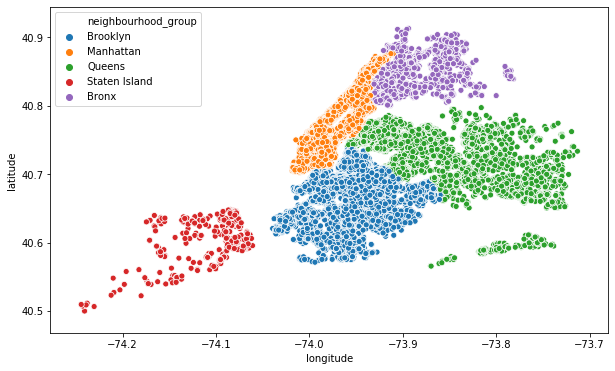

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(air_bnb_nyc.longitude,air_bnb_nyc.latitude,hue=air_bnb_nyc.neighbourhood_group)
plt.ioff()
plt.savefig('Maps of Neighbourhood group.png')

The graph is about the relationship between price and room type based on Neighbourhood group.

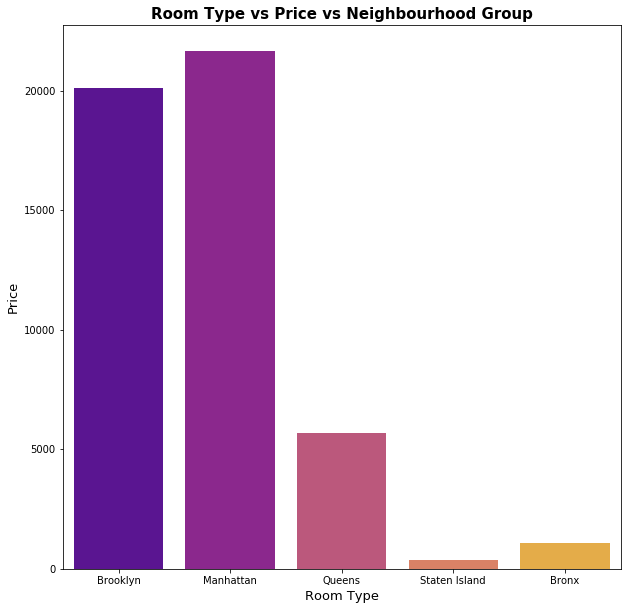

In [13]:
sns.countplot(air_bnb_nyc['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')
plt.savefig('Room Type vs Price vs Neighbourhood Group.png')

The graph shows that neighborhood group Manhattan and Brooklyn has large number of count in private and entire home/apt. In Manhattan entire home/apt has more than 12,000 count than Brooklyn but Brooklyn has more than 10,000 private room than Manhattan. In Staten Island city Airbnb doesn’t offer shared room service and there is less 500 count room type service. So, Manhattan and Brooklyn city are more officer than other city.

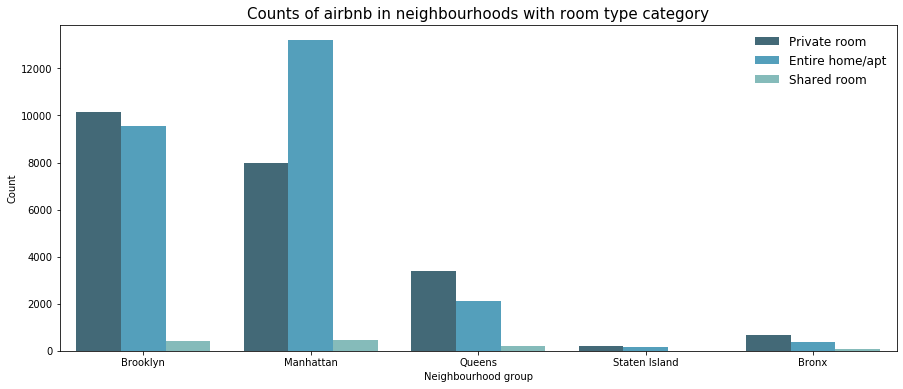

In [14]:
# VNeighbourhood groups with counts with category room_type

plt.figure(figsize=(15,6))
sns.countplot(data=air_bnb_nyc, x='neighbourhood_group', hue='room_type', palette='GnBu_d')
plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)
plt.savefig('Counts of airbnb in neighbourhoods with room type category.png')

The graph shows top neighbourhoods with category of room type base neighbourhood group. The Manhattan and Brooklyn are the two top neighborhoods with category of room type.

<Figure size 1080x432 with 0 Axes>

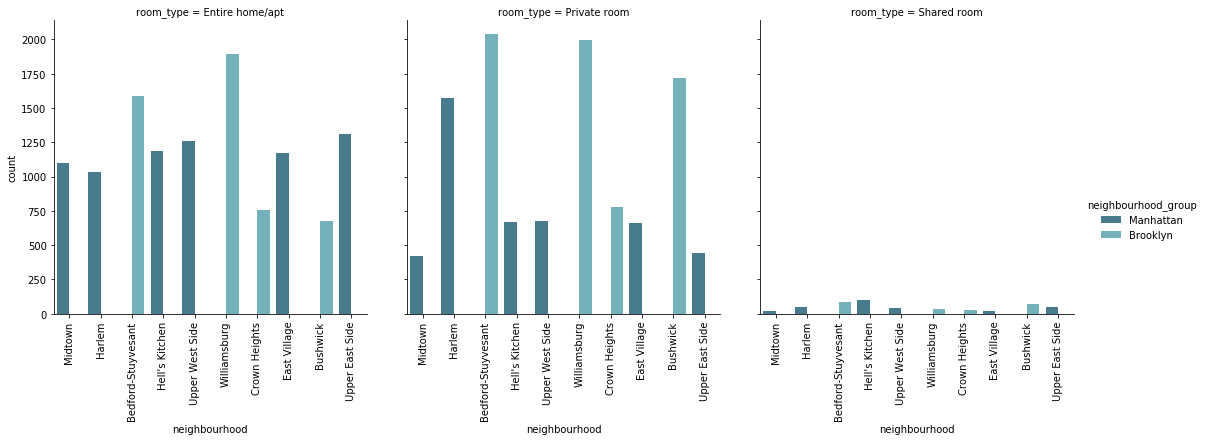

In [16]:
# Top neighbourhoods with category of room type

top_nei = air_bnb_nyc['neighbourhood'].value_counts().reset_index().head(10)
top_nei = top_nei['index'].tolist()

plt.figure(figsize=(15,6))
vis_3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=air_bnb_nyc.loc[air_bnb_nyc['neighbourhood'].isin(top_nei)], kind='count', palette='GnBu_d')
vis_3.set_xticklabels(rotation=90)
plt.savefig('neighbourhoods with category of room type.png')

The graph shows the list of price base on neighborhoods

In [21]:
# Prices in neighbourhoods 

data1 = pd.DataFrame(air_bnb_nyc.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean())
data1.reset_index(inplace=True)

bronx = (data1[data1['neighbourhood_group'] =='Bronx']).sort_values(by='price',ascending=False).head(10)
brooklyn = (data1[data1['neighbourhood_group'] =='Brooklyn']).sort_values(by='price',ascending=False).head(10)
manhattan = (data1[data1['neighbourhood_group'] =='Manhattan']).sort_values(by='price',ascending=False).head(10)
queens = (data1[data1['neighbourhood_group'] =='Queens']).sort_values(by='price',ascending=False).head(10)
staten = (data1[data1['neighbourhood_group'] =='Staten Island']).sort_values(by='price',ascending=False).head(10)

neighs = [bronx, brooklyn, manhattan, queens, staten]
titles = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

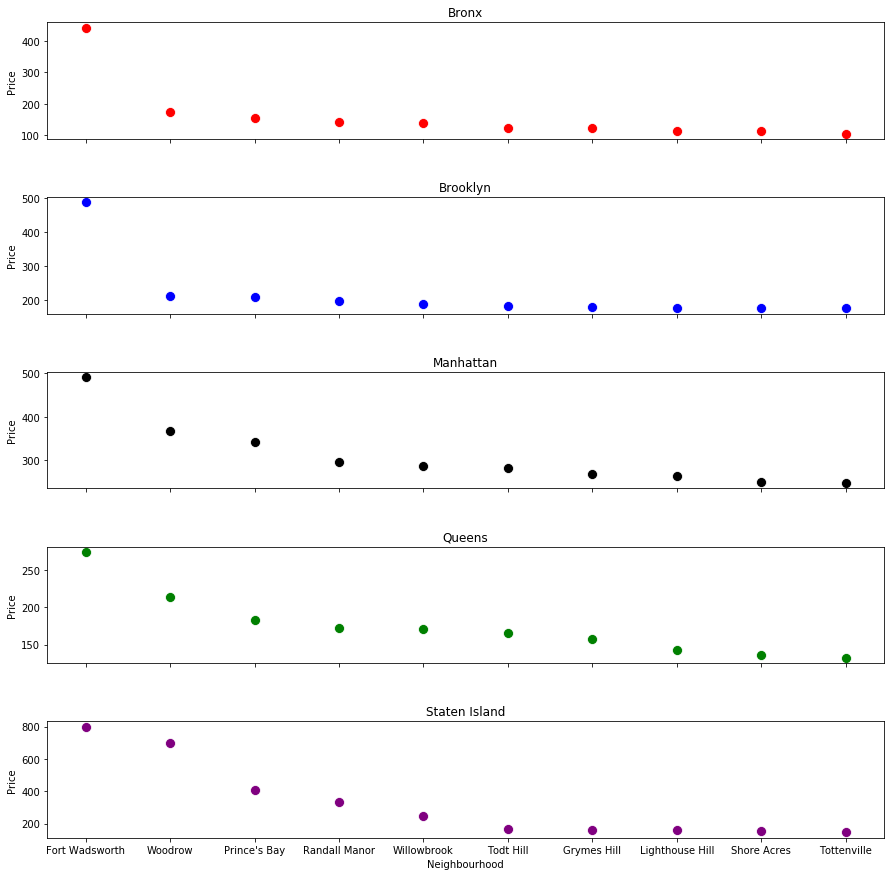

In [52]:
fig, axs = plt.subplots(5, figsize=(15, 15), gridspec_kw={'hspace': 0.5, 'wspace': 0})
sns.scatterplot(data=bronx, x='neighbourhood', y='price', ax=axs[0], color='red', s=100)
sns.scatterplot(data=brooklyn, x='neighbourhood', y='price', ax=axs[1], color='blue', s=100)
sns.scatterplot(data=manhattan, x='neighbourhood', y='price', ax=axs[2], color='black', s=100)
sns.scatterplot(data=queens, x='neighbourhood', y='price', ax=axs[3], color='green', s=100)
sns.scatterplot(data=staten, x='neighbourhood', y='price', ax=axs[4], color='purple', s=100)

axs[0].set_title('Bronx')
axs[1].set_title('Brooklyn')
axs[2].set_title('Manhattan')
axs[3].set_title('Queens')
axs[4].set_title('Staten Island')

for ax in axs:
    ax.set(xlabel='Neighbourhood', ylabel='Price')
    ax.label_outer()
plt.savefig('Prices in neighbourhoods.png')

The graph show Restaurants delivering Online service based on room type. So, Entire home/apt and private room types has an online food delivery services.

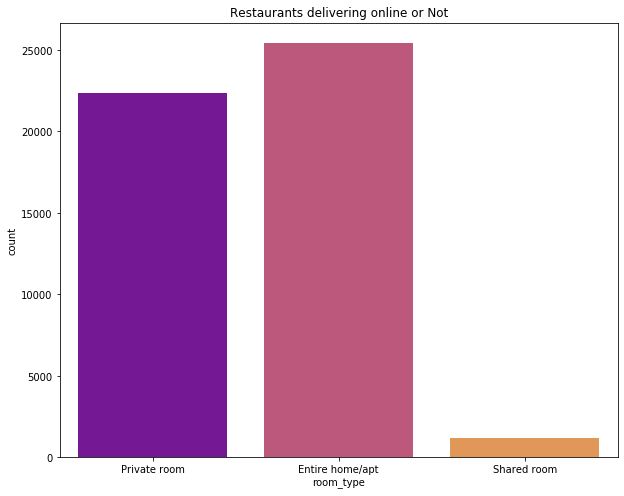

In [54]:
#Restaurants delivering Online or not
sns.countplot(air_bnb_nyc['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title('Restaurants delivering online or Not')
plt.savefig('Restaurants delivering online or Not.png')

The graph shows about  price vs  number of reviews  based on neighborhood group. It shows us the lowest prices have higher reviews than the higher prices. It shows negative correlation between price and number of reviews. Also Manhattan, Brooklyn and Queens areas have higher reviews than others.

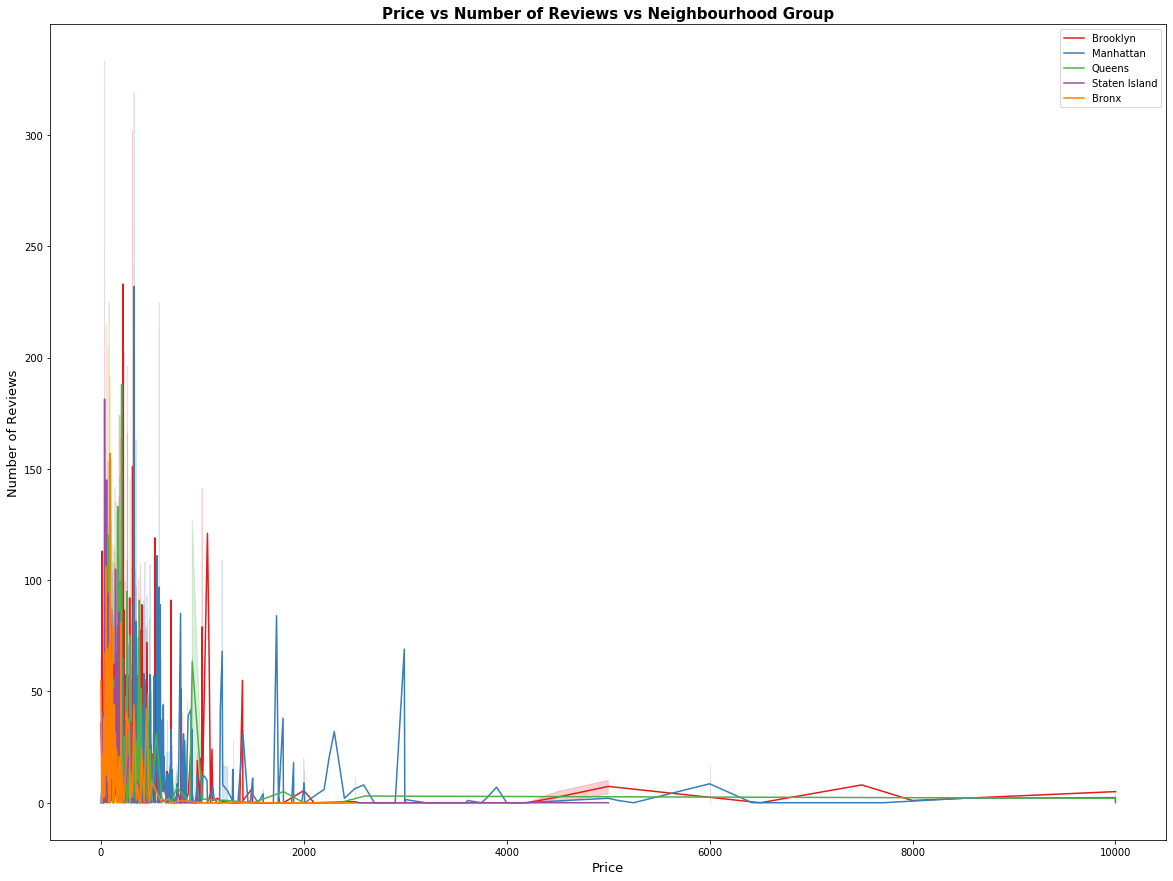

In [18]:
plt.figure(figsize=(20,15))
sns.set_palette("Set1")

sns.lineplot(x='price', y='number_of_reviews', 
             data=air_bnb_nyc[air_bnb_nyc['neighbourhood_group']=='Brooklyn'],
             label='Brooklyn')
sns.lineplot(x='price', y='number_of_reviews', 
             data=air_bnb_nyc[air_bnb_nyc['neighbourhood_group']=='Manhattan'],
             label='Manhattan')
sns.lineplot(x='price', y='number_of_reviews', 
             data=air_bnb_nyc[air_bnb_nyc['neighbourhood_group']=='Queens'],
             label='Queens')
sns.lineplot(x='price', y='number_of_reviews', 
             data=air_bnb_nyc[air_bnb_nyc['neighbourhood_group']=='Staten Island'],
             label='Staten Island')
sns.lineplot(x='price', y='number_of_reviews', 
             data=air_bnb_nyc[air_bnb_nyc['neighbourhood_group']=='Bronx'],
             label='Bronx')
plt.xlabel("Price", size=13)
plt.ylabel("Number of Reviews", size=13)
plt.title("Price vs Number of Reviews vs Neighbourhood Group",size=15, weight='bold')
plt.savefig('Price vs Number of Reviews vs Neighbourhood Group.png')

The graph shows the availability of room based on neighbourhood group. In Queens and Bronx neighborhood has more room availability than other neighborhood.

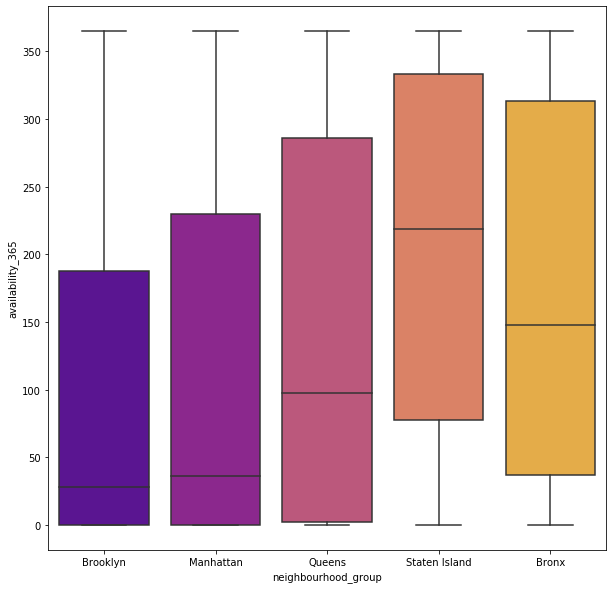

In [56]:
#Relation between neighbourgroup and Availability of Room
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=air_bnb_nyc, x='neighbourhood_group',y='availability_365',palette='plasma')
plt.savefig('neighbourgroup and Availability of Room.png')

The graph show availability of room based on neighbourhood group. Private room has more available in Staten Island and Bronx. On other hand Shared room are available on Queens and Brooklyn.

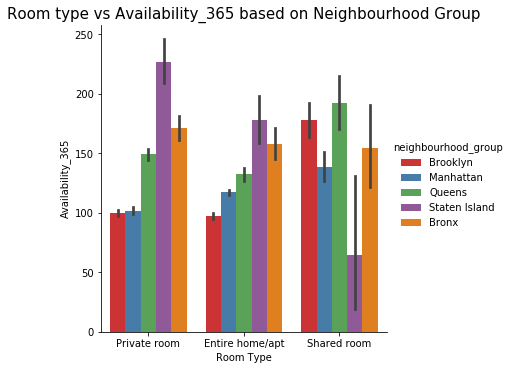

In [61]:
#Relation between neighbourgroup and Availability of Room based on neighbourhood_group
sns.catplot(x="room_type", y="availability_365", hue="neighbourhood_group", kind="bar", data=air_bnb_nyc)
plt.title('Room type vs Availability_365 based on Neighbourhood Group', fontsize=15)
plt.xlabel('Room Type')
fig.set_size_inches(5,5)
plt.ylabel("Availability_365")
plt.savefig('Availability_365.png')

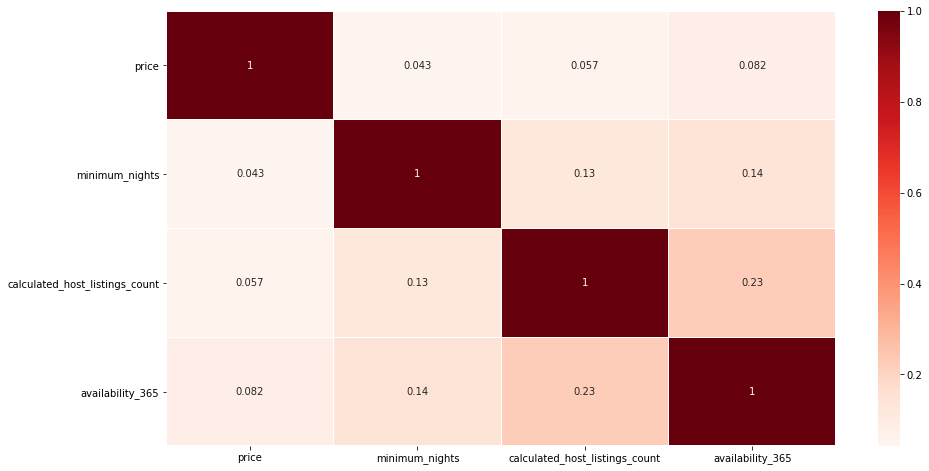

In [58]:
# Visualisation 7 - correlations between values

plt.figure(figsize=(15,8))
sns.heatmap(air_bnb_nyc.corr(), annot=True, linewidths=0.1, cmap='Reds')
plt.savefig('correlations.png')

## 5. Regression Analysis

#### Drop Columns

In [34]:
air_bnb_nyc.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#examing the changes
air_bnb_nyc.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


In [35]:
#Encode the input Variables
def Encode(air_bnb_nyc):
 ''' neighbourhood_group and room_type are categorical data they must be convert into numerical data. neighbourhood_group: have have five categorical data.room_type: have three categorical data.'''    for column in air_bnb_nyc.columns[air_bnb_nyc.columns.isin(['neighbourhood_group', 'room_type'])]:
        air_bnb_nyc[column] = air_bnb_nyc[column].factorize()[0]
    return air_bnb_nyc

airbnb_en = Encode(air_bnb_nyc.copy())

In [36]:
#examing the changes
airbnb_en.head(15)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0
5,1,1,200,3,1,129
6,0,0,60,45,1,0
7,1,0,79,2,1,220
8,1,0,79,2,1,0
9,1,1,150,1,4,188


In [37]:
#Defining the independent variables and dependent variables
x = airbnb_en.iloc[:,[0,1,3,4,5]]
y = airbnb_en['price']

In [38]:
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

17736    125
24351    101
10069    189
11679    145
16315    120
Name: price, dtype: int64

In [39]:
#Prepare a Linear Regression Model
linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_pred=linear_regression.predict(x_test)

r2_score(y_test,y_pred)

0.07480306392848757

In [42]:
# Evaluated metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print('MAE (Mean Absolute Error): %s' %mae)
print('MSE (Mean Squared Error): %s' %mse)
print('RMSE (Root mean squared error): %s' %rmse)
print('R2 score: %s' %r2)

MAE (Mean Absolute Error): 75.0593371815643
MSE (Mean Squared Error): 31181.688363241432
RMSE (Root mean squared error): 176.58337510434393
R2 score: 0.07480306392848757


Text(0, 0.5, 'Test')

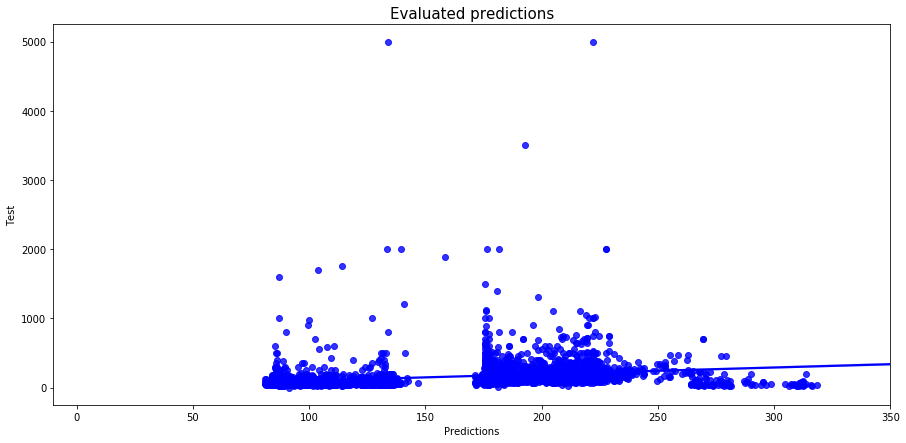

In [43]:
# Evaluated predictions

plt.figure(figsize=(15,7))
plt.xlim(-10,350)
sns.regplot(y=y_test, x=y_pred, color='blue')
plt.title('Evaluated predictions', fontsize=15)
plt.xlabel('Predictions')
plt.ylabel('Test')

#### Refernces
 - https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
 - https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb
 - https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb
 - https://www.kaggle.com/geowiz34/maps-of-nyc-airbnbs-with-python